In [1]:
#imports personal details to connect to db
import config
#import our function files
import query_helper
import payscale_uni_webscrape


import json
import requests
from bs4 import BeautifulSoup
api_key = config.API_key
import time 
import mysql.connector
from mysql.connector import errorcode
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statistics
import math
import scipy.stats as stats
from scipy import stats
from statsmodels.stats.power import TTestIndPower

# Start by running Gabriel_DB_setup.py file


# Next well call functions to scrape info and load into the db

In [3]:
#Below code gets info for page then commits to db, repeats process on all pages
#if we have duplicates they will be skipped on db commit process

web_page_iterator = 1
while web_page_iterator <64:
    #scrape web infor for 1 page
    list_of_dict = payscale_uni_webscrape.get_pages(web_page_iterator)

    #put infor into tuples and commit to db
    query_helper.tuple_payscale_uni(list_of_dict)
    
    #iterate and loop
    web_page_iterator +=1
    


KeyboardInterrupt: 

# Pull info from our db


In [4]:
df = query_helper.query_to_df('SELECT * FROM payscale_colleges')

In [5]:
# df[df['early_car_pay']]
df_private = df[df.uni_type.str.contains('Private')==True]

In [6]:
df['Private'] = 0
df.head()


,uni,uni_type,early_car_pay,mid_car_pay,high_meaning,stem_deg,Private
0,Abilene Christian University,"Private School, Religious, For Sports Fans",49700,90900,53.0,9.0,0
1,Adams State University,State School,44400,81400,56.0,3.0,0
2,Adelphi University,"Private School, Research University",53700,96400,50.0,6.0,0
3,Adrian College,"Private School, Religious",42400,78000,58.0,12.0,0
4,Adventist University of Health Sciences,"Private School, Religious",51600,89800,88.0,5.0,0


In [7]:
df["Private"] = df.uni_type.apply(lambda x: 1 if "Private" in x else 0)

In [8]:
df.head()

,uni,uni_type,early_car_pay,mid_car_pay,high_meaning,stem_deg,Private
0,Abilene Christian University,"Private School, Religious, For Sports Fans",49700,90900,53.0,9.0,1
1,Adams State University,State School,44400,81400,56.0,3.0,0
2,Adelphi University,"Private School, Research University",53700,96400,50.0,6.0,1
3,Adrian College,"Private School, Religious",42400,78000,58.0,12.0,1
4,Adventist University of Health Sciences,"Private School, Religious",51600,89800,88.0,5.0,1


In [9]:
df.groupby(['Private'])[['early_car_pay','mid_car_pay']].agg(['count', 'mean',np.std]).unstack()

                      Private
early_car_pay  count  0            580.000000
                      1            985.000000
               mean   0          49548.275862
                      1          48995.329949
               std    0           6900.890818
                      1           8315.776130
mid_car_pay    count  0            580.000000
                      1            985.000000
               mean   0          89155.344828
                      1          88395.837563
               std    0          13135.943480
                      1          15714.752563
dtype: float64

In [11]:
public_early_count = df.groupby(['Private'])[['early_car_pay','mid_car_pay']].agg(['count', 'mean',np.std]).unstack()[0]
private_early_count = df.groupby(['Private'])[['early_car_pay','mid_car_pay']].agg(['count', 'mean',np.std]).unstack()[1]
public_early_mean = df.groupby(['Private'])[['early_car_pay','mid_car_pay']].agg(['count', 'mean',np.std]).unstack()[2]
private_early_mean = df.groupby(['Private'])[['early_car_pay','mid_car_pay']].agg(['count', 'mean',np.std]).unstack()[3]
public_early_std = df.groupby(['Private'])[['early_car_pay','mid_car_pay']].agg(['count', 'mean',np.std]).unstack()[4]
private_early_std = df.groupby(['Private'])[['early_car_pay','mid_car_pay']].agg(['count', 'mean',np.std]).unstack()[5]

# get mid career info
public_mid_count = df.groupby(['Private'])[['early_car_pay','mid_car_pay']].agg(['count', 'mean',np.std]).unstack()[6]
private_mid_count = df.groupby(['Private'])[['early_car_pay','mid_car_pay']].agg(['count', 'mean',np.std]).unstack()[7]
public_mid_mean = df.groupby(['Private'])[['early_car_pay','mid_car_pay']].agg(['count', 'mean',np.std]).unstack()[8]
private_mid_mean = df.groupby(['Private'])[['early_car_pay','mid_car_pay']].agg(['count', 'mean',np.std]).unstack()[9]
public_mid_std = df.groupby(['Private'])[['early_car_pay','mid_car_pay']].agg(['count', 'mean',np.std]).unstack()[10]
private_mid_std = df.groupby(['Private'])[['early_car_pay','mid_car_pay']].agg(['count', 'mean',np.std]).unstack()[11]


In [13]:
df_private = df[df['Private']==1]
df_public = df[df["Private"]==0]

In [14]:
private=df_private['early_car_pay']
private_list = private.tolist()
private.describe()

public=df_public['early_car_pay']
public_list = public.tolist()
public.describe()

count      580.000000
mean     49548.275862
std       6900.890818
min      32500.000000
25%      44775.000000
50%      48650.000000
75%      52700.000000
max      80600.000000
Name: early_car_pay, dtype: float64

[]

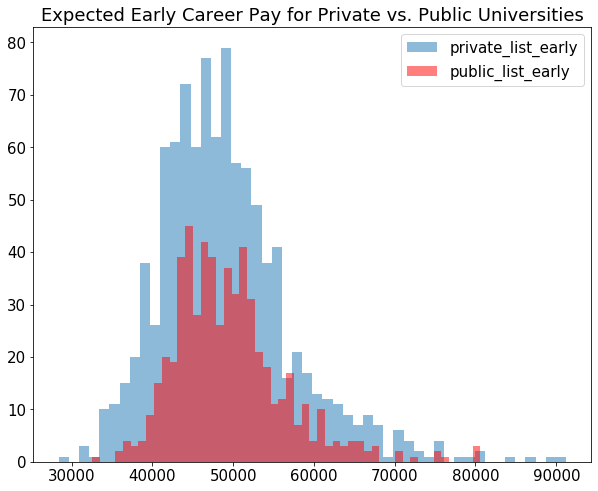

In [109]:
plt.figure(figsize=(10,8))
plt.hist(private_list, bins=50, alpha=.5,label ='private_list_early')
plt.hist(public_list, bins=50, color='r', alpha = 0.5, label='public_list_early')
plt.legend()
plt.title('Expected Early Career Pay for Private vs. Public Universities')
plt.plot()

## Sample using Central limit theorem to get normal distribution

Mean: 48994.43113, Standard Deviation: 788.413520201755
Mean: 49547.15415, Standard Deviation: 627.4074280623217


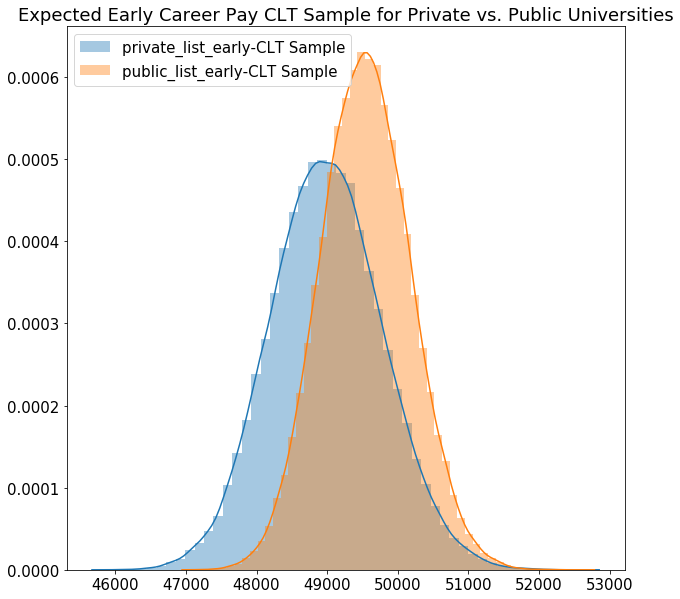

In [111]:
samples = [np.random.choice(private_list, replace=False, size=100) for i in range(100000)]
print('Mean: {}, Standard Deviation: {}'.format(
                                                np.mean([np.mean(i) for i in samples]),
                                                np.std([np.mean(i) for i in samples])
                                            )
     )

samples1 = [np.random.choice(public_list, replace=False, size=100) for i in range(100000)]
print('Mean: {}, Standard Deviation: {}'.format(
                                                np.mean([np.mean(i) for i in samples1]),
                                                np.std([np.mean(i) for i in samples1])
                                            )
     )
plt.figure(figsize=(10,10))
sns.distplot([np.mean(i) for i in samples],label ='private_list_early-CLT Sample')
sns.distplot([np.mean(i) for i in samples1],label ='public_list_early-CLT Sample')
plt.title('Expected Early Career Pay CLT Sample for Private vs. Public Universities')
plt.legend()

## Now well do a 2 sample z test for EARLY CAREER SALARY


In [20]:
standard_error_of_mean_diff = math.sqrt((public_early_std**2/public_early_count +private_early_std**2/private_early_count))
z = (public_early_mean-private_early_mean)/(standard_error_of_mean_diff)
z

1.4168201211290246

We fail to reject our null hypothesis

There is no significant difference in early career expected salary for those who attend public vs private school 

I could have made a type 2 error

## Now well do power analysis

In [21]:
p_value = stats.norm.sf(abs(z)) #one-sided
p_value

0.07826776266232675

In [22]:
beta = 1-p_value
beta

0.9217322373376733

It appears there is and 8% chance we made a Type 2 error


## Now well look at MID CAREER SALARY for private vs public schools

First we wil look at a histogram of mid career pay

In [24]:
private=df_private['mid_car_pay']
private_list_mid = private.tolist()
private.describe()

public=df_public['mid_car_pay']
public_list_mid = public.tolist()
public.describe()

count       580.000000
mean      89155.344828
std       13135.943480
min       61900.000000
25%       79900.000000
50%       87200.000000
75%       96025.000000
max      152800.000000
Name: mid_car_pay, dtype: float64

[]

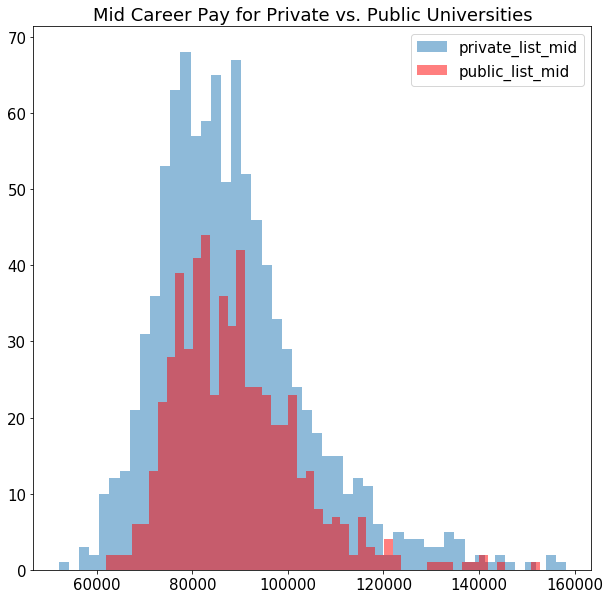

In [118]:
plt.figure(figsize=(10,10))
plt.hist(private_list_mid, bins=50, alpha=.5, label='private_list_mid')
plt.hist(public_list_mid, bins=50, color='r', alpha = 0.5, label="public_list_mid")
plt.legend()
plt.title('Mid Career Pay for Private vs. Public Universities')
plt.plot()

Now we'll use the central limit theorem
THis allows us to...? get sample standard deviation? 

Mean: 88402.40734, Standard Deviation: 1487.1378803440266
Mean: 89154.94346, Standard Deviation: 1191.3407745155155


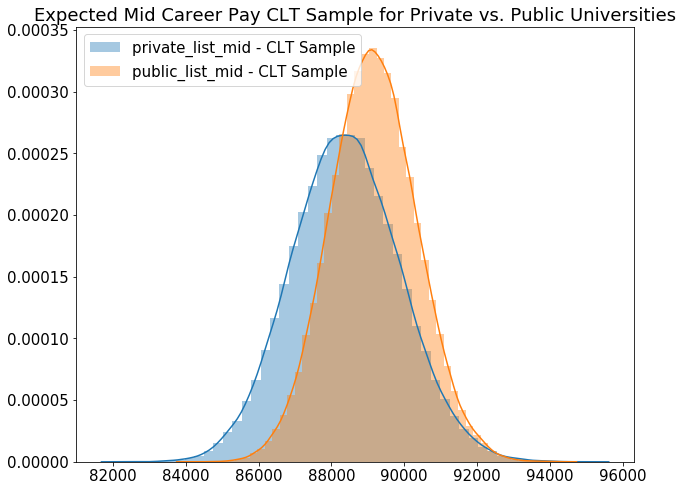

In [120]:
samples = [np.random.choice(private_list_mid, replace=False, size=100) for i in range(100000)]
print('Mean: {}, Standard Deviation: {}'.format(
                                                np.mean([np.mean(i) for i in samples]),
                                                np.std([np.mean(i) for i in samples])
                                            )
     )

samples1 = [np.random.choice(public_list_mid, replace=False, size=100) for i in range(100000)]
print('Mean: {}, Standard Deviation: {}'.format(
                                                np.mean([np.mean(i) for i in samples1]),
                                                np.std([np.mean(i) for i in samples1])
                                            )
     )
plt.figure(figsize=(10,8))
sns.distplot([np.mean(i) for i in samples],label="private_list_mid - CLT Sample")
sns.distplot([np.mean(i) for i in samples1], label= 'public_list_mid - CLT Sample')
plt.title('Expected Mid Career Pay CLT Sample for Private vs. Public Universities')
plt.legend()


## Now well do a 2 sample z test MID CAREER PAY


In [121]:
standard_error_of_mean_diff = math.sqrt((public_mid_std**2/public_mid_count +private_mid_std**2/private_mid_count))
z = (public_mid_mean-private_mid_mean)/(standard_error_of_mean_diff)
z

1.0257812369620891

In [122]:
p_value = stats.norm.sf(abs(z)) #one-sided
p_value

0.15249735608732057

We fail to reject our null hypothesis

There is no significant difference in mid career expected salary for those who attend public vs private school 

I could have made a type 2 error. Below well use power analysis to find the chance that a type 2 error is made

## Now well do power analysis MID CAREER PAY

In [123]:
beta = 1-p_value
beta

0.8475026439126794

There is a 16% chance we made Type 2 errors